# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
fulldata = pd.merge(mouse_metadata,study_results,on = "Mouse ID")
# Display the data table for preview
fulldata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
uniquemice = fulldata["Mouse ID"].nunique()
print(F"The number of unique mice is: {uniquemice}")

The number of unique mice is: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicatedmice = fulldata.loc[fulldata.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
print(f"Mouse ID's with duplicated time points: {duplicatedmice}")
duplicatedmice[0]

Mouse ID's with duplicated time points: ['g989']


'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupedata = fulldata.loc[fulldata["Mouse ID"] == duplicatedmice[0]]
dupedata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandf = fulldata.loc[fulldata["Mouse ID"] != duplicatedmice[0]]
cleandf.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
newunique = cleandf["Mouse ID"].nunique()
print(f"The number of new unique mouse ID's are: {newunique}")

The number of new unique mouse ID's are: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summarystat = cleandf.groupby("Drug Regimen")["Tumor Volume (mm3)"]
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
sumdf = pd.DataFrame({
    "Mean":summarystat.mean(),
    "Median":summarystat.median(),
    "Variance":summarystat.var(),
    "Standard Deviation":summarystat.std(),
    "Standard Error":summarystat.sem()
})
sumdf.head()

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary = cleandf.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
# Using the aggregation method, produce the same summary statistics in a single line
summary.columns = ["Mean ","Median ","Variance","Std. Dev.","Std. Err."]
summary.head()

,Mean,Median,Variance,Std. Dev.,Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

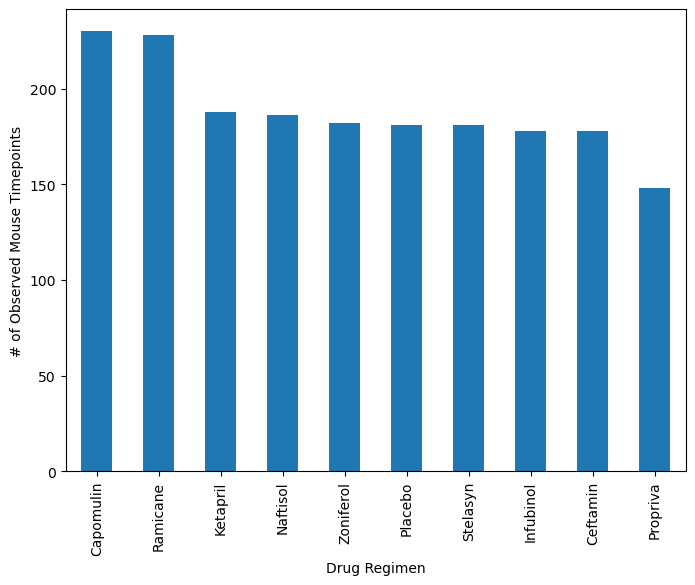

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_chart_pd = cleandf["Drug Regimen"].value_counts().plot(kind = "bar", figsize =(8,6))
bar_chart_pd.set_xlabel("Drug Regimen")
bar_chart_pd.set_ylabel("# of Observed Mouse Timepoints")

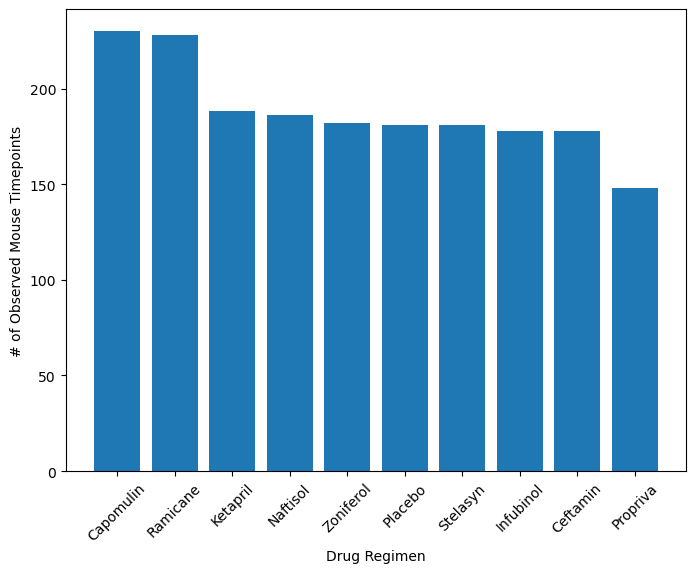

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugcount = cleandf["Drug Regimen"].value_counts()
plt.figure(figsize=(8,6))
plt.bar(drugcount.index,drugcount.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = 45)
plt.show()

Text(0, 0.5, 'Sex')

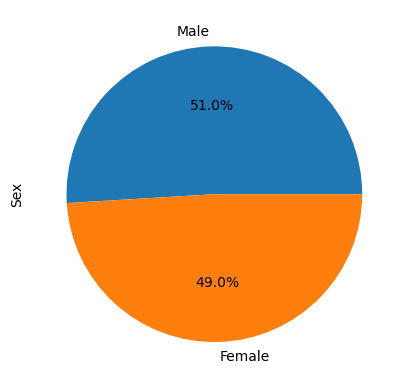

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gendercount = cleandf["Sex"].value_counts()
pdpie = gendercount.plot(kind = "pie", autopct = "%1.1f%%")
pdpie.set_ylabel("Sex")

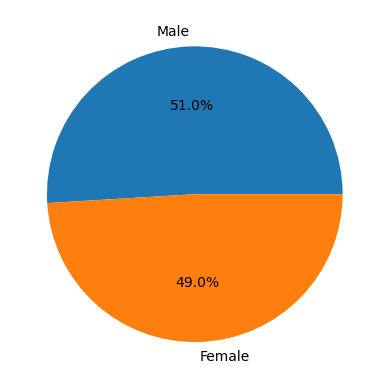

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gendercount, labels=gendercount.index, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
grouped_df = cleandf.groupby("Mouse ID").agg({"Timepoint": "max"}).reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
cleanmerge = pd.merge(grouped_df, cleandf, on=["Mouse ID", "Timepoint"], how="left")

In [23]:
# Put treatments into a list for for loop (and later for plot labels)
promising_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumorvoldata = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = cleanmerge["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
IQR = (quartiles[0.75] - quartiles[0.25])
lower_bound = quartiles[0.25] - (1.5 * IQR)
upper_bound = quartiles[0.75] + (1.5 * IQR)
print(f"The lower bound on complete data is: {lower_bound}")
print("The lowest value in the dataset is: "+ str(cleanmerge["Tumor Volume (mm3)"].min()))
print(f"The upper bound for complete data is: {upper_bound}")
print("The highest value in the dataset is: "+ str(cleanmerge["Tumor Volume (mm3)"].max()))
print("_______________________________________________________________")
for drug in promising_regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = cleandf.loc[cleandf["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    quartiles = drug_data.quantile([0.25, 0.5, 0.75])
    IQR = (quartiles[0.75] - quartiles[0.25])
    lower_bound = quartiles[0.25] - (1.5 * IQR)
    upper_bound = quartiles[0.75] + (1.5 * IQR)
    # add subset 
    tumorvoldata.append(drug_data)
    # Determine outliers using upper and lower bounds
    outliers = drug_data.loc[(drug_data < lower_bound) | (drug_data > upper_bound)].values
    print(f"Outliers for {drug}:")
    print(outliers)

The lower bound on complete data is: 17.10923096124998
The lowest value in the dataset is: 22.05012627
The upper bound for complete data is: 93.82025999125003
The highest value in the dataset is: 78.56701362
_______________________________________________________________
Outliers for Capomulin:
[25.47214326 23.34359787]
Outliers for Ramicane:
[22.05012627]
Outliers for Infubinol:
[]
Outliers for Ceftamin:
[]


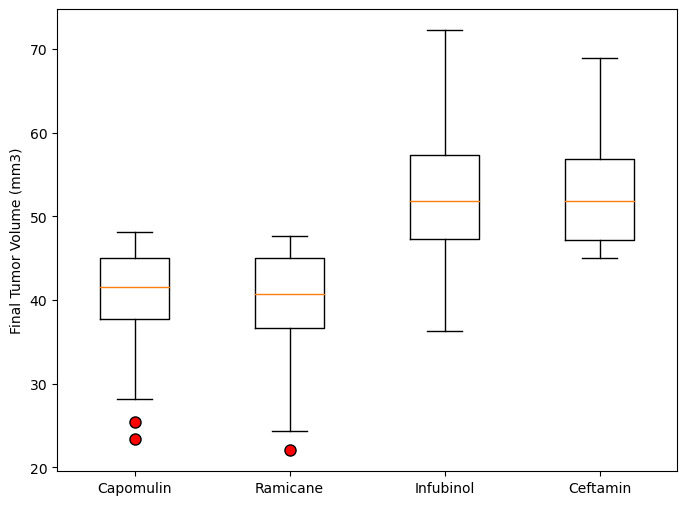

In [24]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(8, 6))
plt.boxplot(tumorvoldata, labels=promising_regimens, flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 8})
plt.xlabel("")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

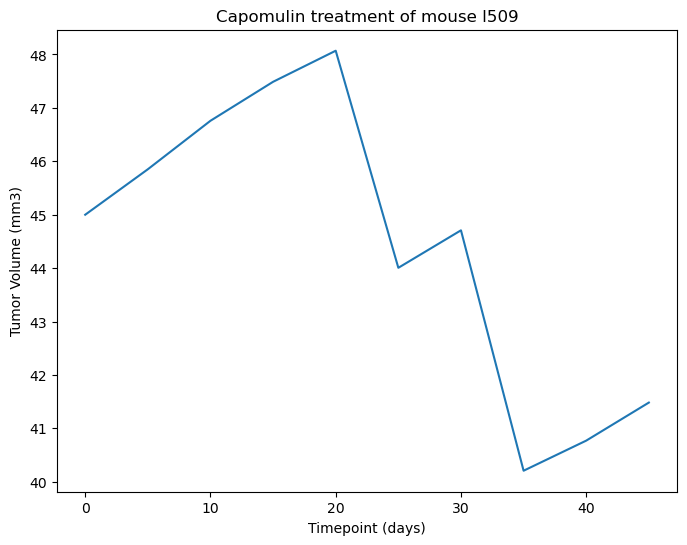

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Select a mouse treated with Capomulin
capomulin_mouse = cleandf.loc[(cleandf["Mouse ID"] == "l509")]

# Line plot of tumor volume versus time point for the selected mouse
plt.figure(figsize=(8, 6))
plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"], marker="")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

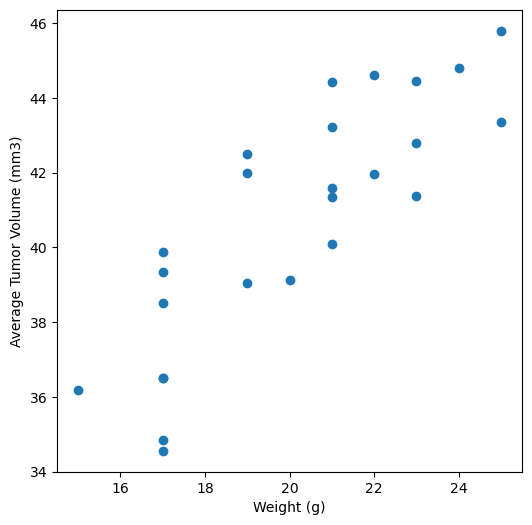

In [26]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Calculate the average observed tumor volume and mouse weight for the Capomulin treatment regimen
capomulin_data = cleandf.loc[cleandf["Drug Regimen"] == "Capomulin"]
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Scatter plot of mouse weight versus average observed tumor volume
plt.figure(figsize=(6, 6))
plt.scatter(mouse_weight, avg_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

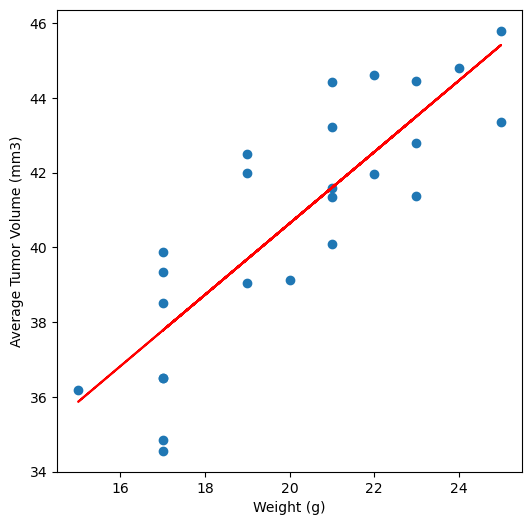

The correlation between mouse weight and the average tumor volume is: 0.8419363424694719


In [27]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(mouse_weight, avg_tumor_volume)[0]
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, avg_tumor_volume)

# Plot the linear regression model on top of the scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(mouse_weight, avg_tumor_volume)
plt.plot(mouse_weight, slope * mouse_weight + intercept, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

# Print correlation coefficient
print(f"The correlation between mouse weight and the average tumor volume is: {correlation}")
